install mlflow

In [1]:
pip install fuzzywuzzy

import libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset and read it

In [35]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")
df.info()
df.describe()
df.head()
df.tail()
df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

227838

In [36]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


check null values

In [37]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Drop unnecessary columns

In [38]:
df = df.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'])

Encode categorical features

In [39]:
categorical_columns = ['Sex', 'Diet']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Split the Blood Pressure column into two columns

In [40]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

df = df.drop(columns=['Blood Pressure'])

Normalize numerical features

In [41]:
numerical_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
                      'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides' , 'Systolic', 'Diastolic']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Separate features and target


In [42]:
X = df.drop(columns=['Heart Attack Risk'], axis=1)
y = df['Heart Attack Risk']

Split the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN Model

KNN Model:
Accuracy: 0.5818596691386195
Precision: 0.3747016706443914
Recall: 0.25
F1 Score: 0.29990448901623684


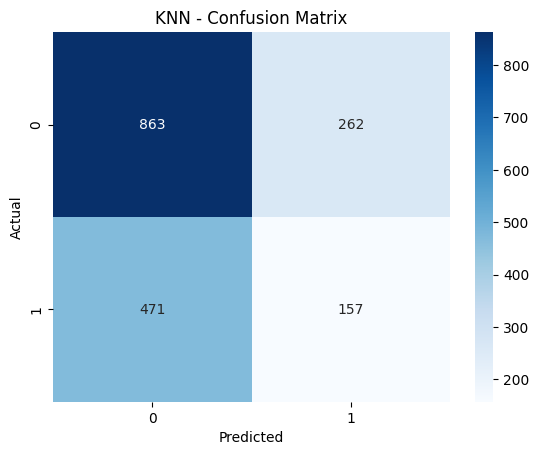

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, zero_division=1)
rec_knn = recall_score(y_test, y_pred_knn, zero_division=1)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Model:")
print(f"Accuracy: {acc_knn}")
print(f"Precision: {prec_knn}")
print(f"Recall: {rec_knn}")
print(f"F1 Score: {f1_knn}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random forest model

Random Forest Model:
Accuracy: 0.6411865373645179
Precision: 0.48484848484848486
Recall: 0.025477707006369428
F1 Score: 0.048411497730711045


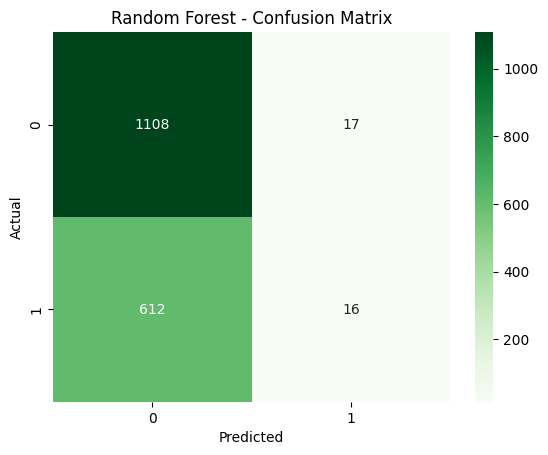

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, zero_division=1)
rec_rf = recall_score(y_test, y_pred_rf, zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Accuracy: {acc_rf}")
print(f"Precision: {prec_rf}")
print(f"Recall: {rec_rf}")
print(f"F1 Score: {f1_rf}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gradient Boosting Model

Gradient Boosting Model:
Accuracy: 0.6354820308043354
Precision: 0.23809523809523808
Recall: 0.007961783439490446
F1 Score: 0.015408320493066256


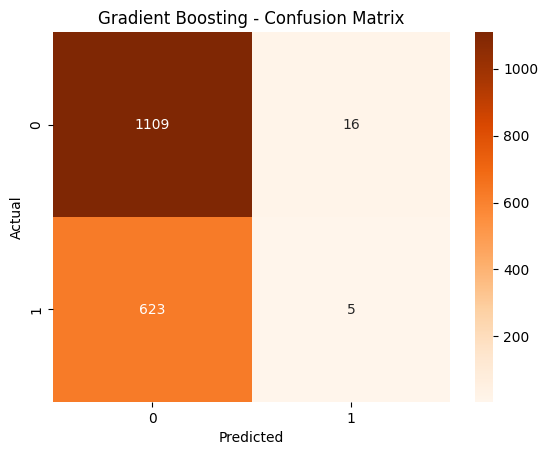

In [46]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb, zero_division=1)
rec_gb = recall_score(y_test, y_pred_gb, zero_division=1)
f1_gb = f1_score(y_test, y_pred_gb)

print("Gradient Boosting Model:")
print(f"Accuracy: {acc_gb}")
print(f"Precision: {prec_gb}")
print(f"Recall: {rec_gb}")
print(f"F1 Score: {f1_gb}")

cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

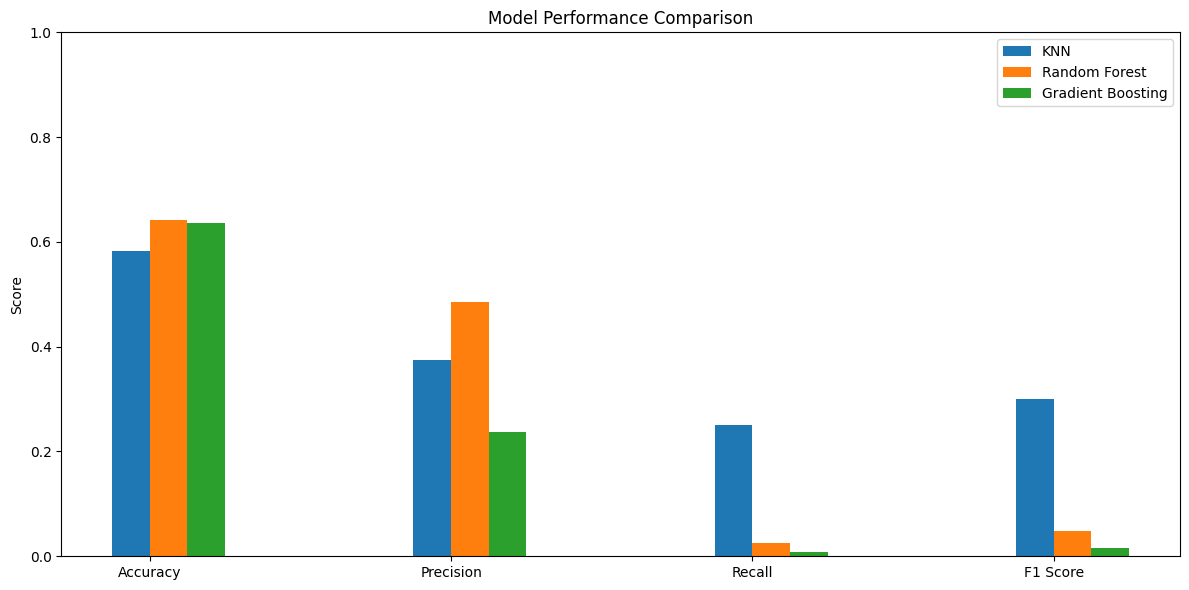

In [52]:
model_scores = {
    "KNN": [acc_knn, prec_knn, rec_knn, f1_knn],
    "Random Forest": [acc_rf, prec_rf, rec_rf, f1_rf],
    "Gradient Boosting": [acc_gb, prec_gb, rec_gb, f1_gb]
}

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

x = np.arange(len(metrics))*2
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - 0.5*width, model_scores["KNN"], width, label="KNN")
plt.bar(x + 0.5*width, model_scores["Random Forest"], width, label="Random Forest")
plt.bar(x + 1.5*width, model_scores["Gradient Boosting"], width, label="Gradient Boosting")

plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

Random Forest (Feature importance)

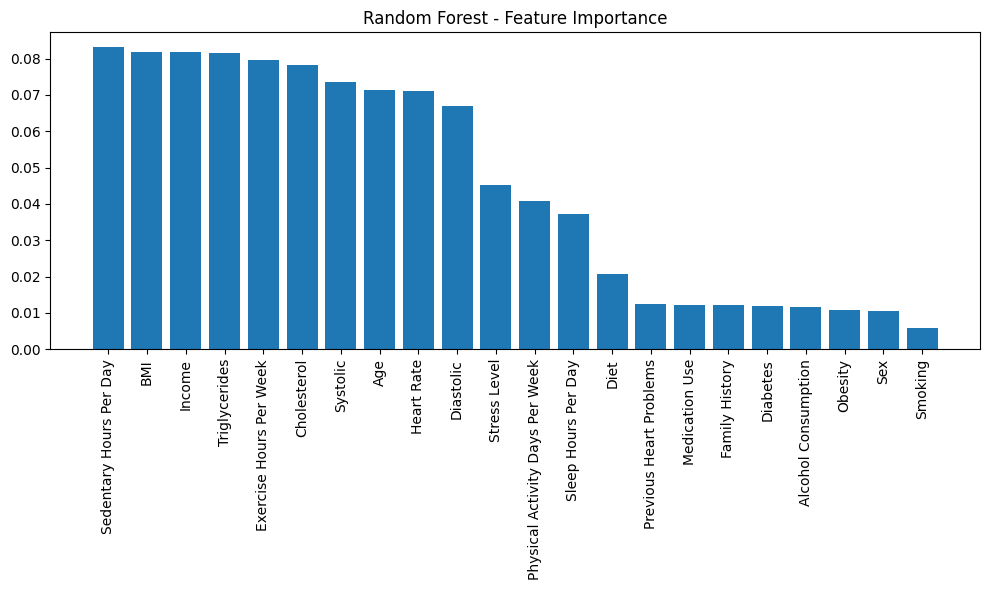

In [48]:
importances_rf = rf.feature_importances_
features = X.columns
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importances_rf[indices_rf])
plt.xticks(range(len(features)), features[indices_rf], rotation=90)
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()

Gradient Boosting (Feature importance)

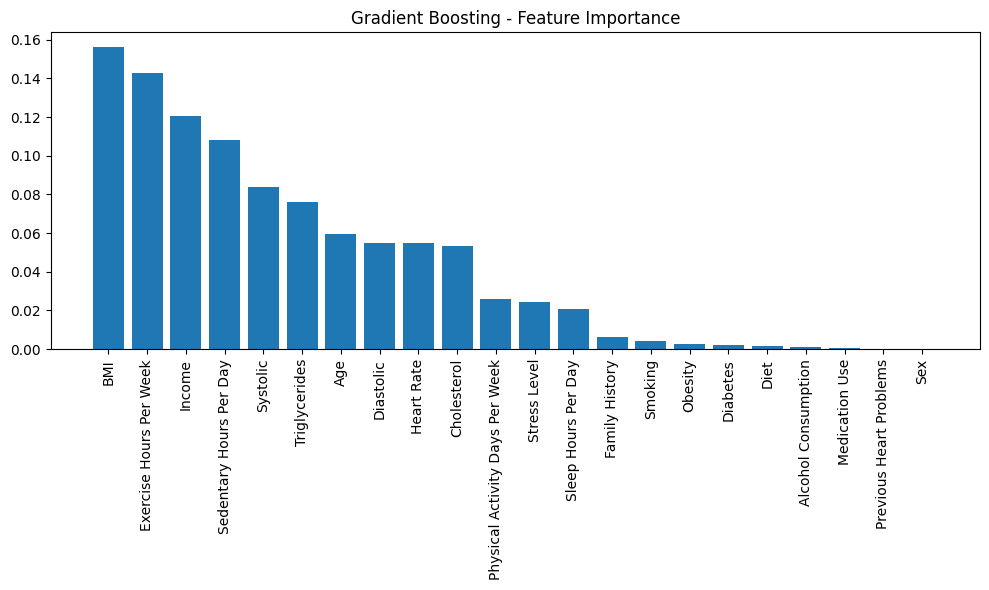

In [49]:
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importances_gb[indices_gb])
plt.xticks(range(len(features)), features[indices_gb], rotation=90)
plt.title("Gradient Boosting - Feature Importance")
plt.tight_layout()
plt.show()

The chatbot

In [50]:
from fuzzywuzzy import fuzz

def get_heart_attack_info(question):
    question = question.lower()

    topics = {
        "age": "Age is a risk factor for heart disease. The risk increases with age.",
        "sex": "Males are generally at a higher risk of heart disease than females.",
        "cholesterol": "High cholesterol levels, especially LDL, can increase the risk of heart disease.",
        "blood pressure": "High blood pressure (e.g., >120/80 mmHg) can damage arteries and increase heart disease risk.",
        "heart rate": "Abnormal heart rates, especially at rest, can be indicators of heart disease.",
        "diabetes": "Diabetes significantly increases the risk of developing heart disease.",
        "family history": "A family history of heart disease is a significant risk factor.",
        "smoking": "Smoking damages blood vessels and increases heart disease risk.",
        "obesity": "Obesity strains the heart and increases the likelihood of heart disease.",
        "triglycerides": "High triglyceride levels are associated with an increased risk of heart disease.",
        "bmi": "A high BMI can indicate obesity, which is a risk factor for heart disease.",
        "physical activity": "Regular physical activity reduces the risk of heart disease.",
        "sleep hours": "Insufficient or poor-quality sleep is linked to heart disease.",
        "sedentary hours": "Extended sedentary periods increase the risk of heart disease.",
        "heart attack risk": "The dataset includes a calculated risk score for heart attacks based on various factors."
    }

    best_match = max(topics.keys(), key=lambda topic: fuzz.partial_ratio(topic, question))

    threshold = 70
    if fuzz.partial_ratio(best_match, question) >= threshold:
        return topics[best_match]
    else:
        return "I'm not sure. Would you please be more specific?"

def chatbot():
    print("Welcome to the Heart Attack Information Chatbot")
    print("Enter your heart attack question here, or press 'exit' to end the session.")

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Thank you for using the Heart Attack Information Chatbot. Stay healthy!")
            break

        response = get_heart_attack_info(user_input)
        print("Bot:", response)

chatbot()


Welcome to the Heart Attack Information Chatbot
Enter your heart attack question here, or press 'exit' to end the session.
You: my hear pressure is 130/70
Bot: Abnormal heart rates, especially at rest, can be indicators of heart disease.
You: exit
Thank you for using the Heart Attack Information Chatbot. Stay healthy!
